In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
# Load your dataset
df = pd.read_csv(r'E:\Coding\Python\Phishing\training_dataset.csv')

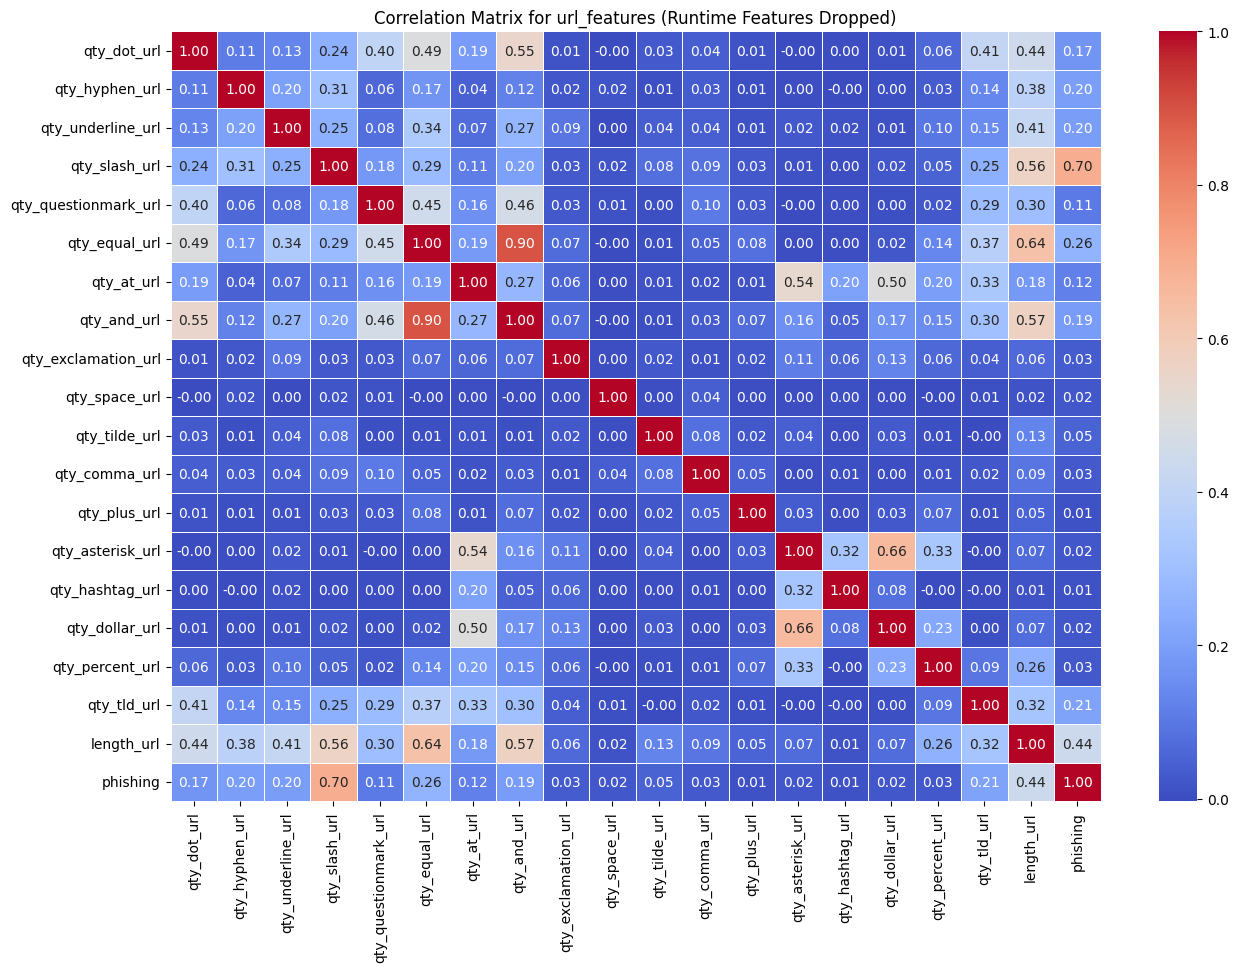

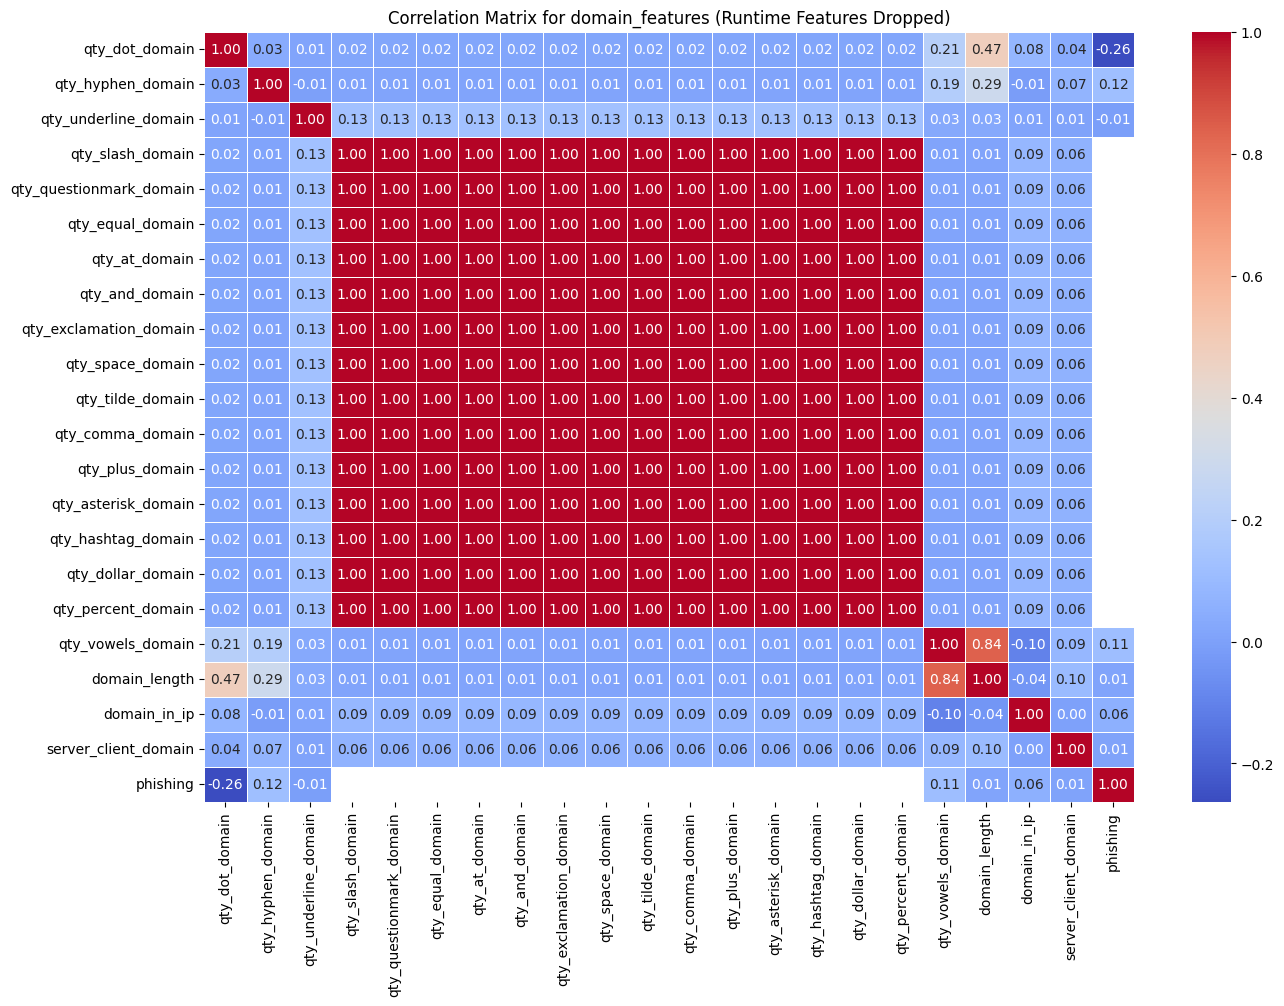

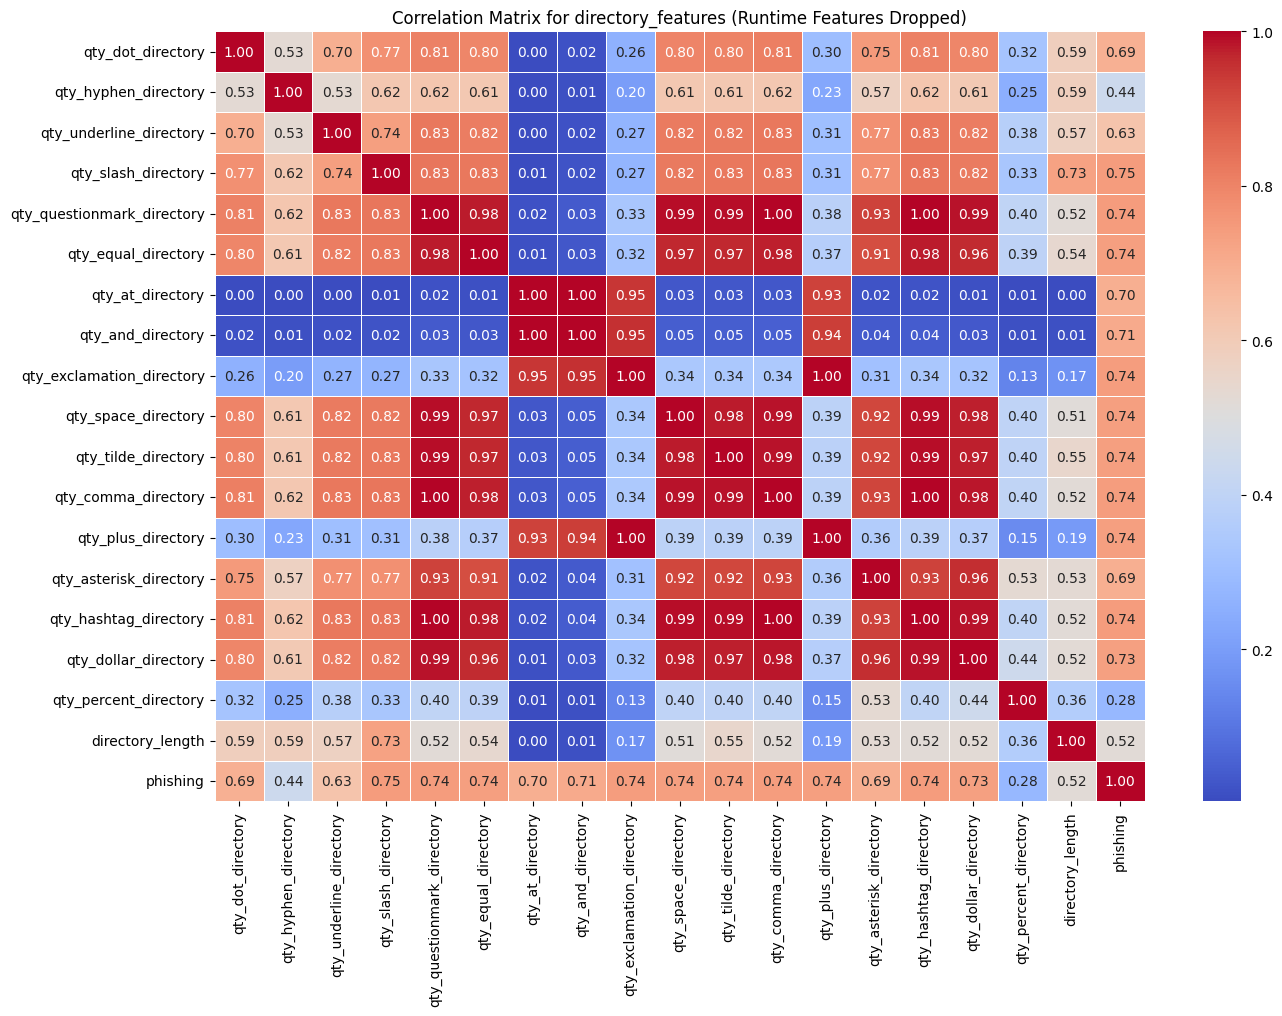

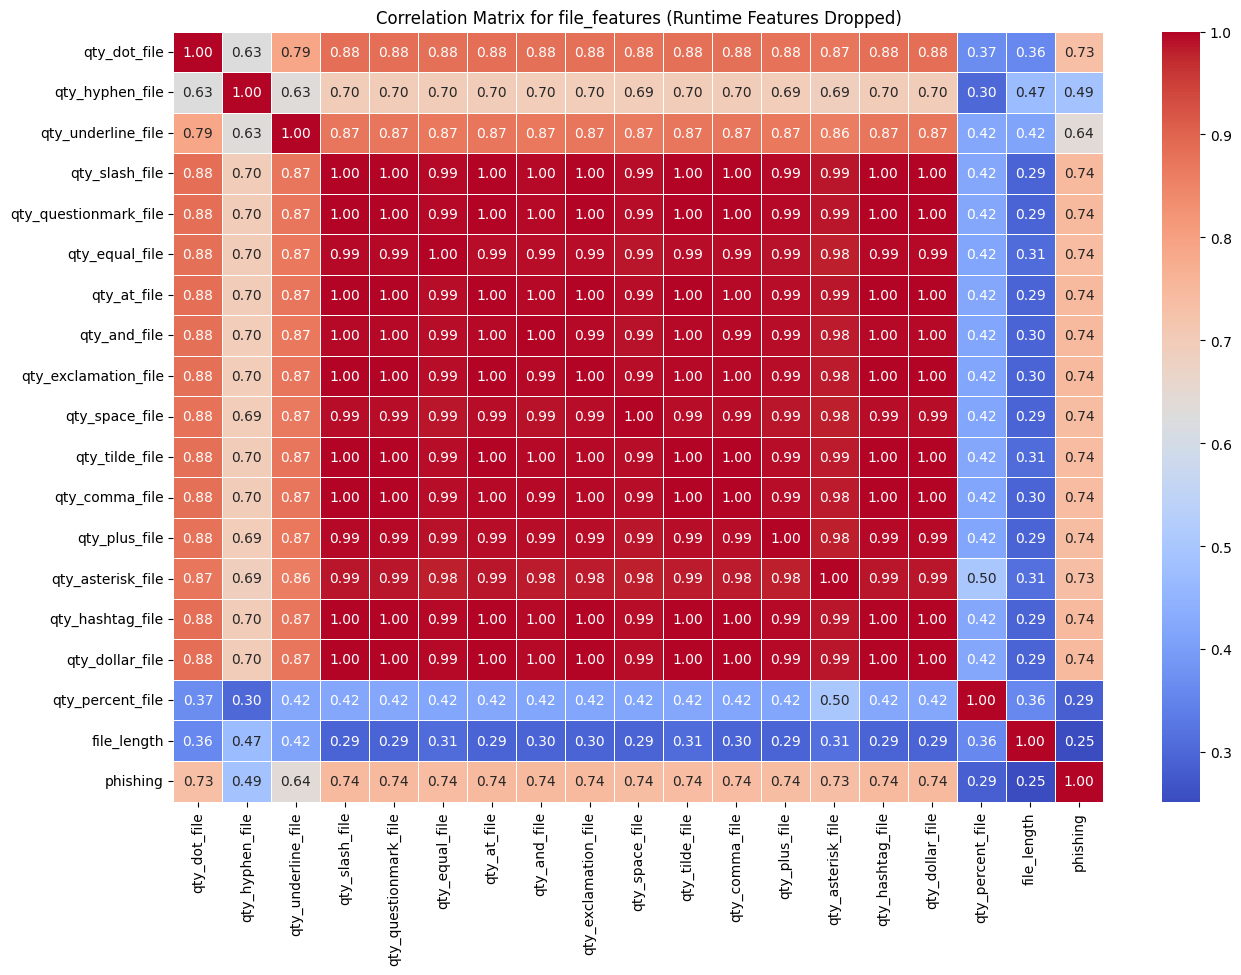

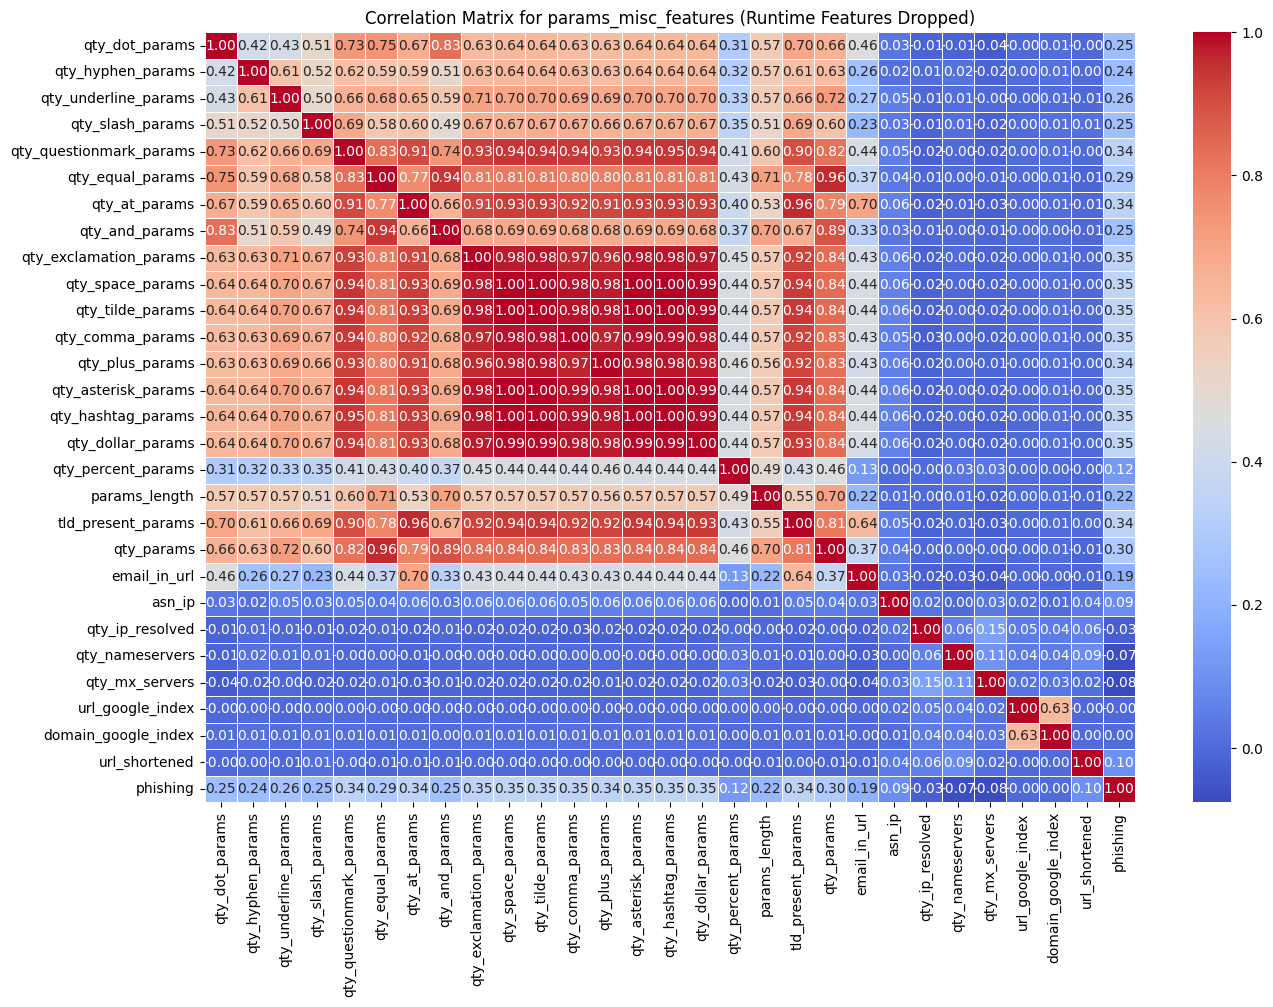

In [ ]:
# Define runtime-dependent features to drop
runtime_features = [
    'time_response', 'time_domain_activation', 'time_domain_expiration', 
    'ttl_hostname', 'tls_ssl_certificate', 'qty_redirects'
]

# Drop runtime features from the dataset
df = df.drop(columns=runtime_features)

# Define batches (excluding runtime features)
batches = {
    'url_features': ['qty_dot_url', 'qty_hyphen_url', 'qty_underline_url', 'qty_slash_url', 'qty_questionmark_url', 
                     'qty_equal_url', 'qty_at_url', 'qty_and_url', 'qty_exclamation_url', 'qty_space_url', 
                     'qty_tilde_url', 'qty_comma_url', 'qty_plus_url', 'qty_asterisk_url', 'qty_hashtag_url', 
                     'qty_dollar_url', 'qty_percent_url', 'qty_tld_url', 'length_url'],
    
    'domain_features': ['qty_dot_domain', 'qty_hyphen_domain', 'qty_underline_domain', 'qty_slash_domain', 
                        'qty_questionmark_domain', 'qty_equal_domain', 'qty_at_domain', 'qty_and_domain', 
                        'qty_exclamation_domain', 'qty_space_domain', 'qty_tilde_domain', 'qty_comma_domain', 
                        'qty_plus_domain', 'qty_asterisk_domain', 'qty_hashtag_domain', 'qty_dollar_domain', 
                        'qty_percent_domain', 'qty_vowels_domain', 'domain_length', 'domain_in_ip', 'server_client_domain'],
    
    'directory_features': ['qty', 'qty_hyphen_directory', 'qty_underline_directory', 'qty_slash_directory', 
                           'qty_y_dot_directorquestionmark_directory', 'qty_equal_directory', 'qty_at_directory', 'qty_and_directory', 
                           'qty_exclamation_directory', 'qty_space_directory', 'qty_tilde_directory', 'qty_comma_directory', 
                           'qty_plus_directory', 'qty_asterisk_directory', 'qty_hashtag_directory', 'qty_dollar_directory', 
                           'qty_percent_directory', 'directory_length'],
    
    'file_features': ['qty_dot_file', 'qty_hyphen_file', 'qty_underline_file', 'qty_slash_file', 'qty_questionmark_file', 
                      'qty_equal_file', 'qty_at_file', 'qty_and_file', 'qty_exclamation_file', 'qty_space_file', 
                      'qty_tilde_file', 'qty_comma_file', 'qty_plus_file', 'qty_asterisk_file', 'qty_hashtag_file', 
                      'qty_dollar_file', 'qty_percent_file', 'file_length'],
    
    'params_misc_features': ['qty_dot_params', 'qty_hyphen_params', 'qty_underline_params', 'qty_slash_params', 
                             'qty_questionmark_params', 'qty_equal_params', 'qty_at_params', 'qty_and_params', 
                             'qty_exclamation_params', 'qty_space_params', 'qty_tilde_params', 'qty_comma_params', 
                             'qty_plus_params', 'qty_asterisk_params', 'qty_hashtag_params', 'qty_dollar_params', 
                             'qty_percent_params', 'params_length', 'tld_present_params', 'qty_params', 'email_in_url', 
                             'asn_ip', 'qty_ip_resolved', 'qty_nameservers', 'qty_mx_servers', 'url_google_index', 
                             'domain_google_index', 'url_shortened']
}

# Add 'phishing' to each batch
for batch_name, features in batches.items():
    features.append('phishing')

# Plot correlation matrix for each batch
for batch_name, features in batches.items():
    plt.figure(figsize=(15, 10))
    correlation_matrix = df[features].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title(f'Correlation Matrix for {batch_name} (Runtime Features Dropped)')
    plt.show()

In [12]:
# Compute correlation with 'phishing'
correlation_with_phishing = df.corr()['phishing'].abs().sort_values(ascending=False)

# Drop 'phishing' itself (since it will have a correlation of 1)
correlation_with_phishing = correlation_with_phishing.drop('phishing')

# Display top 15 features
top_50_features = correlation_with_phishing.head(50)
print(top_50_features)

qty_slash_directory           0.745492
qty_dollar_file               0.744130
qty_questionmark_file         0.744130
qty_hashtag_directory         0.744130
qty_questionmark_directory    0.744130
qty_slash_file                0.744130
qty_hashtag_file              0.744130
qty_at_file                   0.743966
qty_exclamation_file          0.743804
qty_and_file                  0.743180
qty_exclamation_directory     0.742873
qty_tilde_file                0.742848
qty_equal_file                0.741761
qty_comma_file                0.741415
qty_comma_directory           0.741378
qty_space_file                0.739813
qty_plus_file                 0.739607
qty_tilde_directory           0.738202
qty_space_directory           0.737587
qty_plus_directory            0.737362
qty_equal_directory           0.735878
qty_asterisk_file             0.734553
qty_dollar_directory          0.734430
qty_dot_file                  0.733178
qty_and_directory             0.707506
qty_slash_url            

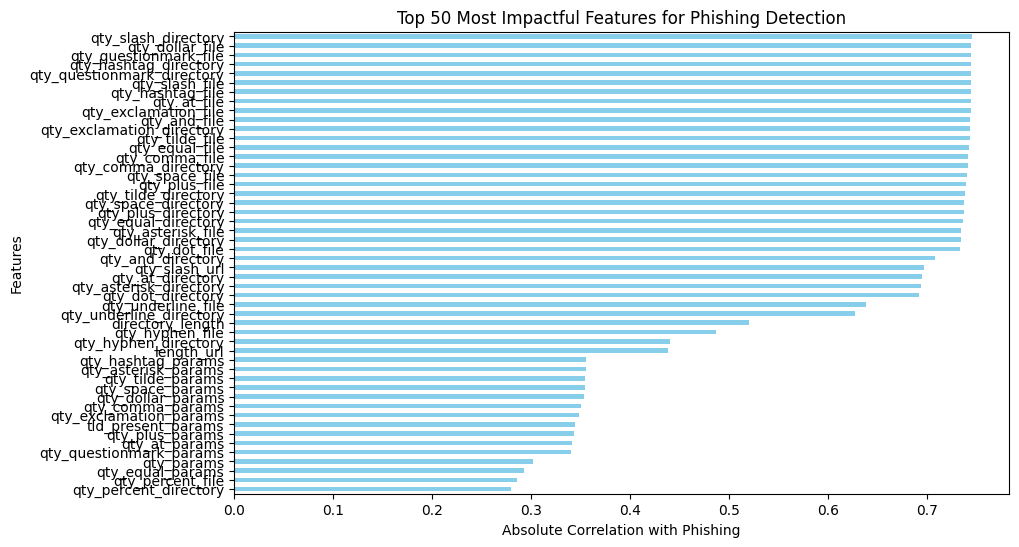

In [13]:
import matplotlib.pyplot as plt

# Plot top 15 features
plt.figure(figsize=(10, 6))
top_50_features.sort_values().plot(kind='barh', color='skyblue')
plt.title('Top 50 Most Impactful Features for Phishing Detection')
plt.xlabel('Absolute Correlation with Phishing')
plt.ylabel('Features')
plt.show()

In [14]:
feature_categories = {
    'url_features': ['qty_dot_url', 'qty_hyphen_url', 'qty_underline_url', 'qty_slash_url', 'qty_questionmark_url', 
                     'qty_equal_url', 'qty_at_url', 'qty_and_url', 'qty_exclamation_url', 'qty_space_url', 
                     'qty_tilde_url', 'qty_comma_url', 'qty_plus_url', 'qty_asterisk_url', 'qty_hashtag_url', 
                     'qty_dollar_url', 'qty_percent_url', 'qty_tld_url', 'length_url'],
    
    'domain_features': ['qty_dot_domain', 'qty_hyphen_domain', 'qty_underline_domain', 'qty_slash_domain', 
                        'qty_questionmark_domain', 'qty_equal_domain', 'qty_at_domain', 'qty_and_domain', 
                        'qty_exclamation_domain', 'qty_space_domain', 'qty_tilde_domain', 'qty_comma_domain', 
                        'qty_plus_domain', 'qty_asterisk_domain', 'qty_hashtag_domain', 'qty_dollar_domain', 
                        'qty_percent_domain', 'qty_vowels_domain', 'domain_length', 'domain_in_ip', 'server_client_domain'],
    
    'directory_features': ['qty_dot_directory', 'qty_hyphen_directory', 'qty_underline_directory', 'qty_slash_directory', 
                           'qty_questionmark_directory', 'qty_equal_directory', 'qty_at_directory', 'qty_and_directory', 
                           'qty_exclamation_directory', 'qty_space_directory', 'qty_tilde_directory', 'qty_comma_directory', 
                           'qty_plus_directory', 'qty_asterisk_directory', 'qty_hashtag_directory', 'qty_dollar_directory', 
                           'qty_percent_directory', 'directory_length'],
    
    'file_features': ['qty_dot_file', 'qty_hyphen_file', 'qty_underline_file', 'qty_slash_file', 'qty_questionmark_file', 
                      'qty_equal_file', 'qty_at_file', 'qty_and_file', 'qty_exclamation_file', 'qty_space_file', 
                      'qty_tilde_file', 'qty_comma_file', 'qty_plus_file', 'qty_asterisk_file', 'qty_hashtag_file', 
                      'qty_dollar_file', 'qty_percent_file', 'file_length'],
    
    'params_misc_features': ['qty_dot_params', 'qty_hyphen_params', 'qty_underline_params', 'qty_slash_params', 
                             'qty_questionmark_params', 'qty_equal_params', 'qty_at_params', 'qty_and_params', 
                             'qty_exclamation_params', 'qty_space_params', 'qty_tilde_params', 'qty_comma_params', 
                             'qty_plus_params', 'qty_asterisk_params', 'qty_hashtag_params', 'qty_dollar_params', 
                             'qty_percent_params', 'params_length', 'tld_present_params', 'qty_params', 'email_in_url', 
                             'asn_ip', 'qty_ip_resolved', 'qty_nameservers', 'qty_mx_servers', 'url_google_index', 
                             'domain_google_index', 'url_shortened']
}

In [15]:
# Initialize a dictionary to store top features for each category
top_features = {}

# Compute correlation and select top 7 features for each category
for category, features in feature_categories.items():
    # Compute correlation with 'phishing'
    correlation_with_phishing = df[features].corrwith(df['phishing']).abs().sort_values(ascending=False)
    
    # Select top 7 features
    top_features[category] = correlation_with_phishing.head(7).index.tolist()

# Display top features for each category
for category, features in top_features.items():
    print(f"Top 7 features from {category}: {features}")

Top 7 features from url_features: ['qty_slash_url', 'length_url', 'qty_equal_url', 'qty_tld_url', 'qty_hyphen_url', 'qty_underline_url', 'qty_and_url']
Top 7 features from domain_features: ['qty_dot_domain', 'qty_hyphen_domain', 'qty_vowels_domain', 'domain_in_ip', 'domain_length', 'qty_underline_domain', 'server_client_domain']
Top 7 features from directory_features: ['qty_slash_directory', 'qty_questionmark_directory', 'qty_hashtag_directory', 'qty_exclamation_directory', 'qty_comma_directory', 'qty_tilde_directory', 'qty_space_directory']
Top 7 features from file_features: ['qty_dollar_file', 'qty_slash_file', 'qty_questionmark_file', 'qty_hashtag_file', 'qty_at_file', 'qty_exclamation_file', 'qty_and_file']
Top 7 features from params_misc_features: ['qty_hashtag_params', 'qty_asterisk_params', 'qty_tilde_params', 'qty_space_params', 'qty_dollar_params', 'qty_comma_params', 'qty_exclamation_params']


c:\Users\Shankar\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\Shankar\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [16]:
# Combine top features from all categories
selected_features = []
for features in top_features.values():
    selected_features.extend(features)

# Display final selected features
print("Final Selected Features:")
print(selected_features)

Final Selected Features:
['qty_slash_url', 'length_url', 'qty_equal_url', 'qty_tld_url', 'qty_hyphen_url', 'qty_underline_url', 'qty_and_url', 'qty_dot_domain', 'qty_hyphen_domain', 'qty_vowels_domain', 'domain_in_ip', 'domain_length', 'qty_underline_domain', 'server_client_domain', 'qty_slash_directory', 'qty_questionmark_directory', 'qty_hashtag_directory', 'qty_exclamation_directory', 'qty_comma_directory', 'qty_tilde_directory', 'qty_space_directory', 'qty_dollar_file', 'qty_slash_file', 'qty_questionmark_file', 'qty_hashtag_file', 'qty_at_file', 'qty_exclamation_file', 'qty_and_file', 'qty_hashtag_params', 'qty_asterisk_params', 'qty_tilde_params', 'qty_space_params', 'qty_dollar_params', 'qty_comma_params', 'qty_exclamation_params']


In [17]:
useful_columns=['qty_slash_url', 'length_url', 'qty_equal_url', 'qty_tld_url', 'qty_hyphen_url', 'qty_underline_url', 'qty_and_url', 'qty_dot_domain', 'qty_hyphen_domain', 'qty_vowels_domain', 'domain_in_ip', 'domain_length', 'qty_underline_domain', 'server_client_domain', 'qty_slash_directory', 'qty_questionmark_directory', 'qty_hashtag_directory', 'qty_exclamation_directory', 'qty_comma_directory', 'qty_tilde_directory', 'qty_space_directory', 'qty_dollar_file', 'qty_slash_file', 'qty_questionmark_file', 'qty_hashtag_file', 'qty_at_file', 'qty_exclamation_file', 'qty_and_file', 'qty_hashtag_params', 'qty_asterisk_params', 'qty_tilde_params', 'qty_space_params', 'qty_dollar_params', 'qty_comma_params', 'qty_exclamation_params']

In [18]:
useful_columns

['qty_slash_url',
 'length_url',
 'qty_equal_url',
 'qty_tld_url',
 'qty_hyphen_url',
 'qty_underline_url',
 'qty_and_url',
 'qty_dot_domain',
 'qty_hyphen_domain',
 'qty_vowels_domain',
 'domain_in_ip',
 'domain_length',
 'qty_underline_domain',
 'server_client_domain',
 'qty_slash_directory',
 'qty_questionmark_directory',
 'qty_hashtag_directory',
 'qty_exclamation_directory',
 'qty_comma_directory',
 'qty_tilde_directory',
 'qty_space_directory',
 'qty_dollar_file',
 'qty_slash_file',
 'qty_questionmark_file',
 'qty_hashtag_file',
 'qty_at_file',
 'qty_exclamation_file',
 'qty_and_file',
 'qty_hashtag_params',
 'qty_asterisk_params',
 'qty_tilde_params',
 'qty_space_params',
 'qty_dollar_params',
 'qty_comma_params',
 'qty_exclamation_params']

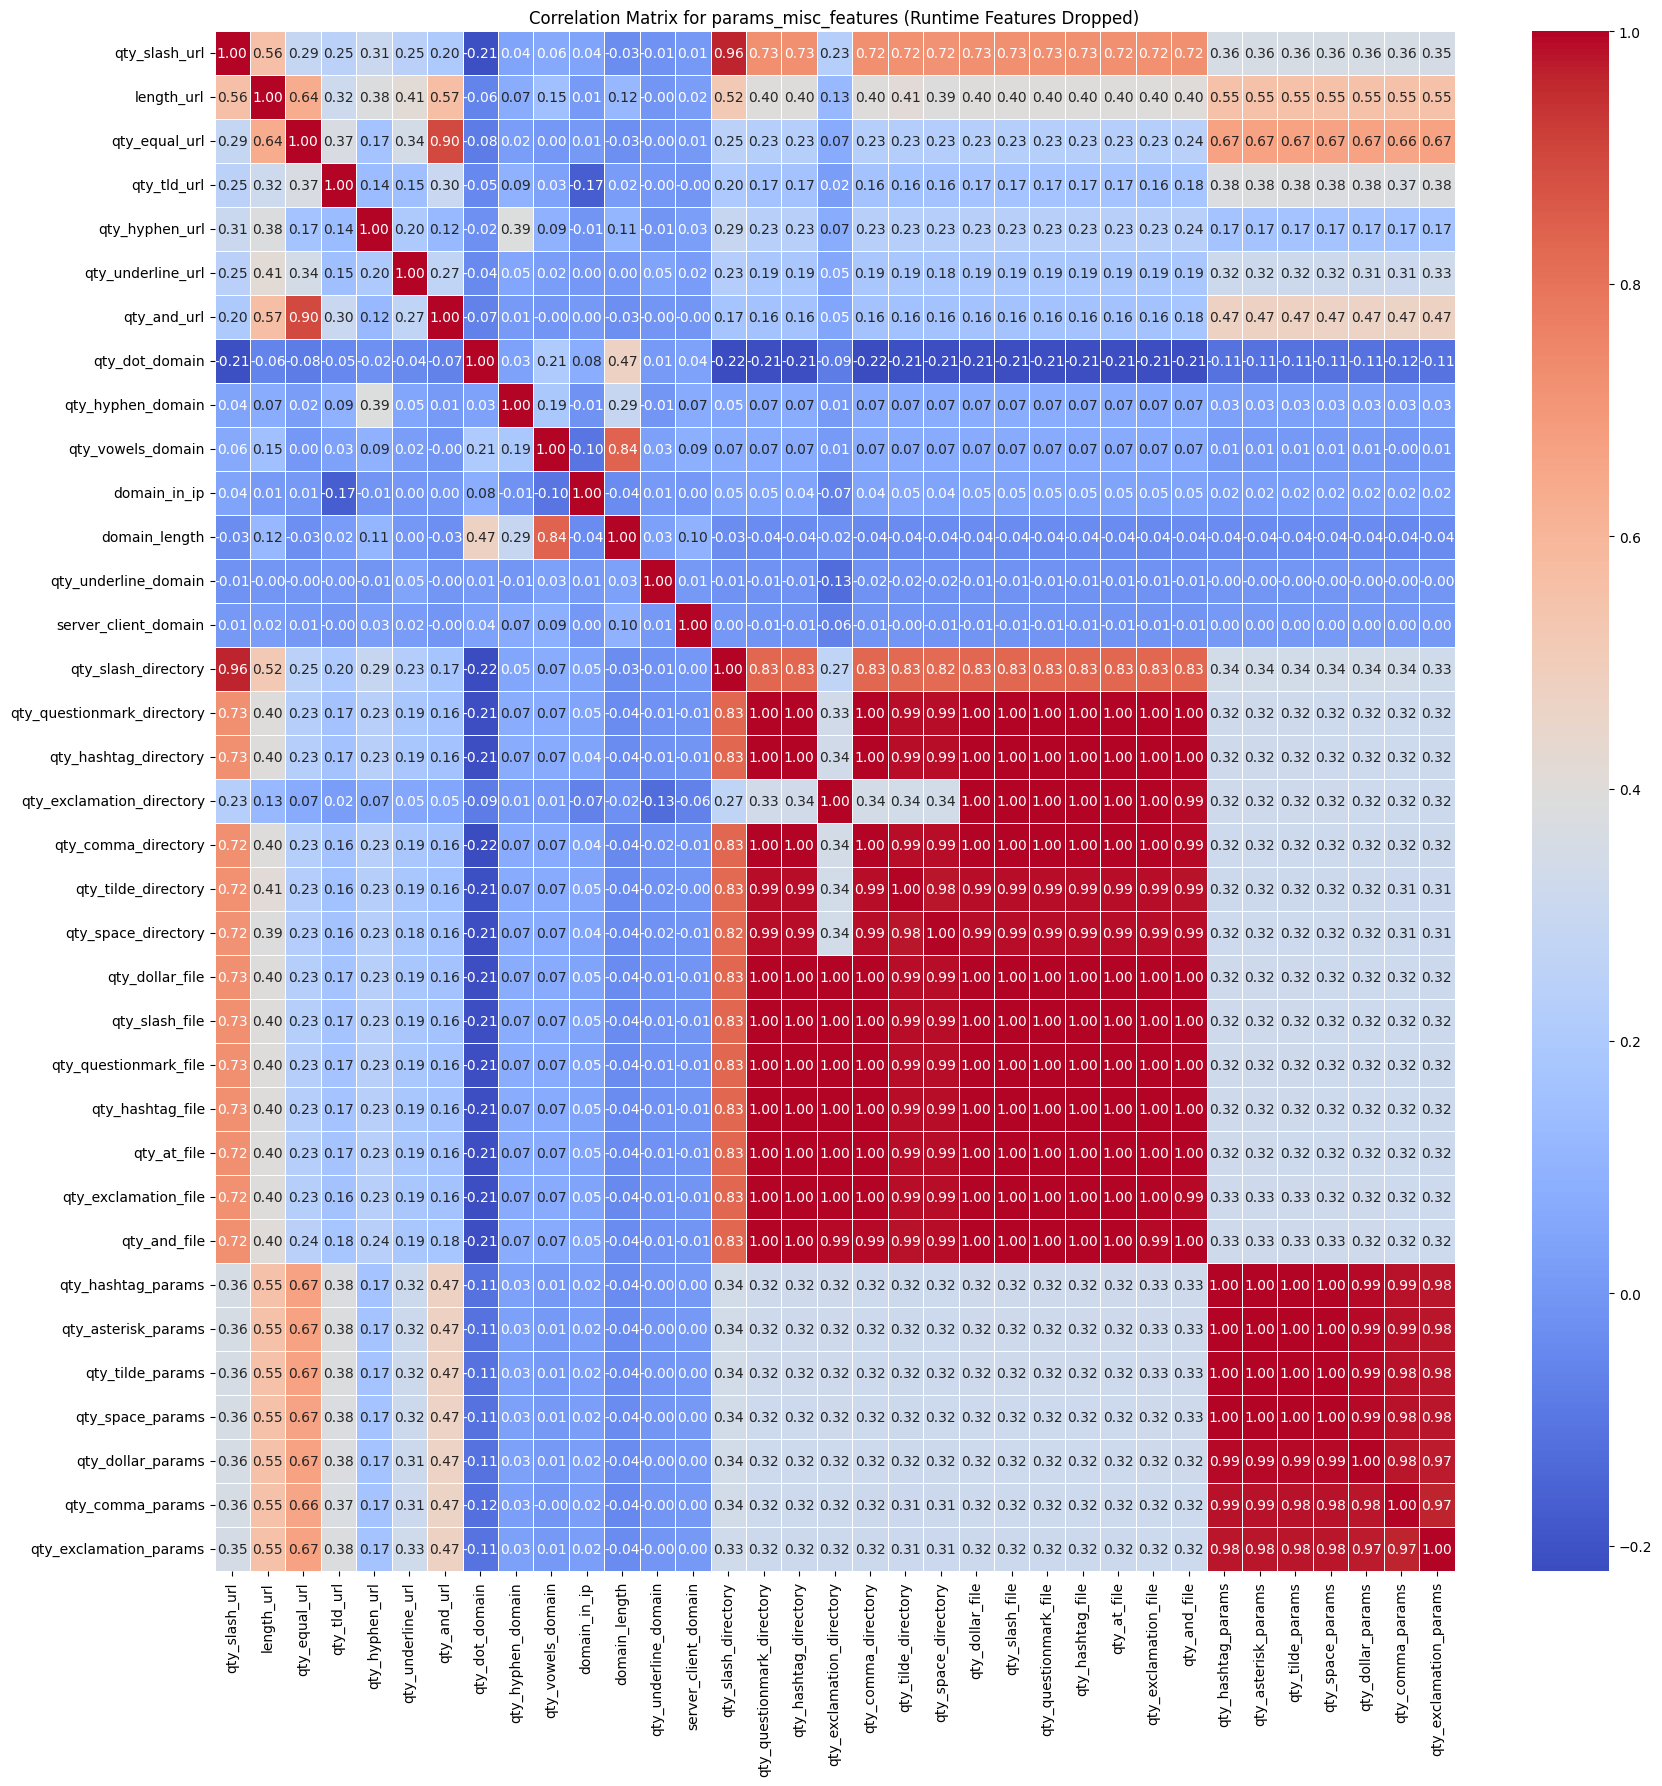

In [22]:
plt.figure(figsize=(20, 20))
correlation_matrix = df[useful_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title(f'Correlation Matrix for {batch_name} (Runtime Features Dropped)')
plt.show()